In [1]:
from core.preprocessing import DataManager, retrend_data
from core.problems import FunctionalRegression
from core.utilities import plot_forecasts, calc_test_mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')

In [2]:
dm = DataManager()
dm.load_all_and_split(reindex=False)

In [3]:
funcreg = FunctionalRegression(dm.detrended_train, dm.detrended_dev)

In [4]:
ns = [1, 2, 5, 10, 20, 30, 40, 50, 75, 100]
param_search = pd.DataFrame(index=ns, columns=['mse'])
for n in ns:
    funcreg.make_forecasts(neighborhood=n)
    param_search.loc[n] = funcreg.calc_mse()

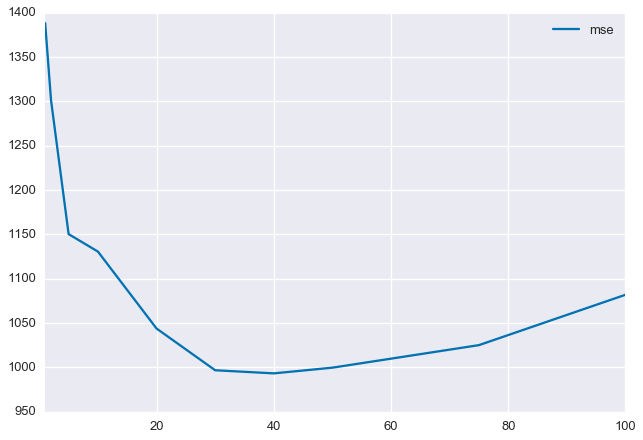

In [5]:
param_search.plot()

In [6]:
funcreg.make_forecasts(neighborhood=40)
funcreg.calc_mse()

993.23538804389398

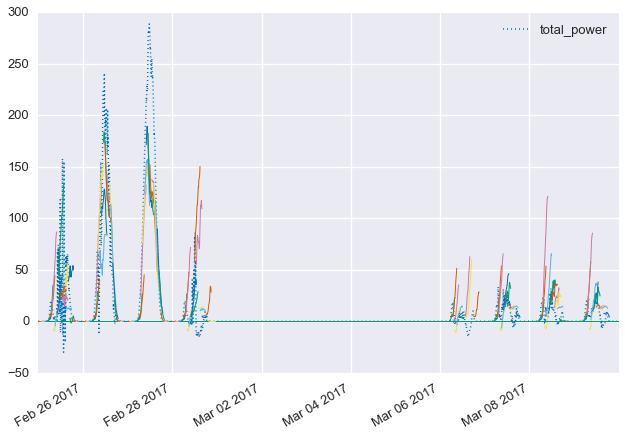

In [7]:
funcreg.plot_test()
#ax = plt.gca()
#lim = ax.get_xlim()
#chunk = (lim[1] - lim[0])/8.
#start = lim[0] + 2*chunk
#end = lim[0] + 6*chunk
#ax.set_xlim(start, end)

Transform back to Power from devation from clear sky.

Leave things in "real time" for now to check MSE calculation

In [8]:
forecasts = funcreg.forecasts

In [9]:
transformed_forecasts = [retrend_data(f) for f in forecasts]
dm.add_forecasts(transformed_forecasts)

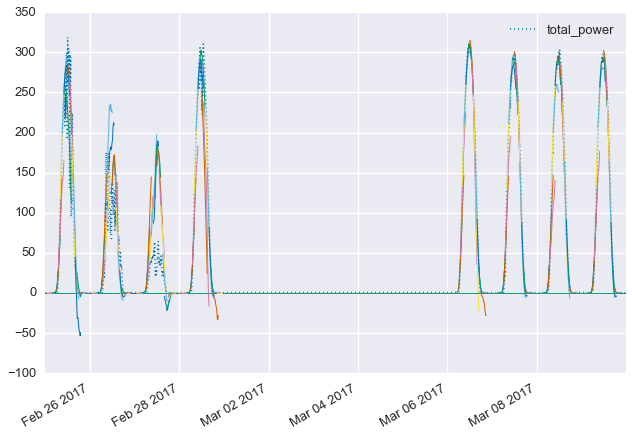

In [10]:
plot_forecasts(dm.original_dev, transformed_forecasts)

In [11]:
calc_test_mse(dm.original_dev, transformed_forecasts)

1453.7591061514433

Make sequential time for plots and check MSE calculation

In [12]:
dm.swap_index()

(24814079.375, 24821276.25)

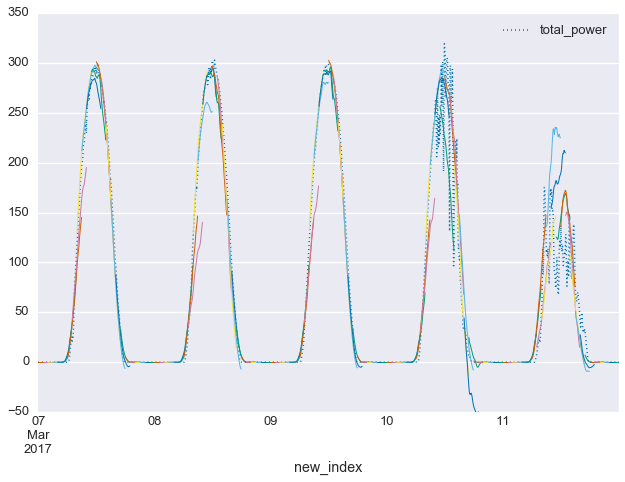

In [15]:
plot_forecasts(dm.original_dev, dm.forecasts)
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 1*chunk
end = lim[0] + 6*chunk
ax.set_ylim(-50, 350)
ax.set_xlim(start, end)

In [14]:
calc_test_mse(dm.original_dev, dm.forecasts)

1453.7591061514422